In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import numpy as np
data = pd.read_json("orderedTwitterArchive.json")
data['created_at'] = pd.to_datetime(data.created_at, format="%Y-%m-%d %H:%M:%S")
data.sort_values(by=['created_at'], inplace=True, ascending=True)
data.reset_index(inplace=True,drop=True)

data['month'] = [d.month for d in data['created_at']]
data["year"] = [d.year for d in data["created_at"]]
data["hour"] = [d.hour for d in data["created_at"]]
data["week_year"] = [d.weekofyear for d in data["created_at"]]
data["date"] = [d.date() for d in data["created_at"]]

data.drop(["created_at","id_str","source"],inplace=True,axis=1)
#lowercase everything
data['modded_text'] = data['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [3]:
len(data[data["is_retweet"] == True]["text"])

1204

In [ ]:
#don't take into account retweets, not written by him
#data = data[data["is_retweet"] == False]

In [4]:
#rimuovi i tag meno frequenti
tags = {}
for idx,row in data.iterrows():
    l = re.findall(r'(?<!\w)(@\w{1,15})\b',row["modded_text"])
    for tag in l:
        if tag in tags:
            tags[tag] = tags[tag] + 1
        else:
            tags[tag] = 1
print("total unique",len(tags))

common = []
uncommon = []
for el in tags:
    if tags[el] >= 10:
        common.append(el)
    if tags[el] < 10:
        uncommon.append(el)
print("unique uncommon", len(uncommon))
print("unique common",len(common))

t = []
for idx,row in data.iterrows():
    l = re.findall(r'(?<!\w)(@\w{1,15})\b',row["modded_text"])
    g = row["modded_text"]
    for el in row["modded_text"].split():
        if el in uncommon:
            g = row["modded_text"].replace(el," ")
    t.append(g)
data["modded1"] = t

total unique 14024
unique uncommon 13705
unique common 319


<function matplotlib.pyplot.show(*args, **kw)>

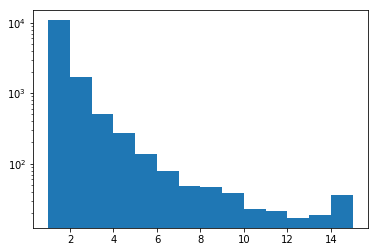

In [5]:
sortedList = list(tags.values())
sortedList.sort(reverse =True)

plt.hist(sortedList,bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],log=True)
plt.show

In [6]:
#check correctly removed stuff
tags1 = {}
for idx,row in data.iterrows():
    l = re.findall(r'(?<!\w)(@\w{1,15})\b',row["modded1"])
    for tag in l:
        if tag in tags1:
            tags1[tag] = tags1[tag] + 1
        else:
            tags1[tag] = 1
print(len(tags1))

10996


In [7]:
data

,favorite_count,in_reply_to_user_id_str,is_retweet,retweet_count,text,month,year,hour,week_year,date,modded_text,modded1
0,202,NaN,False,253,Be sure to tune in and watch Donald Trump on L...,5,2009,18,19,2009-05-04,be sure to tune in and watch donald trump on l...,be sure to tune in and watch donald trump on l...
1,3,NaN,False,2,Donald Trump will be appearing on The View tom...,5,2009,1,19,2009-05-05,donald trump will be appearing on the view tom...,donald trump will be appearing on the view tom...
2,2,NaN,False,3,Donald Trump reads Top Ten Financial Tips on L...,5,2009,13,19,2009-05-08,donald trump reads top ten financial tips on l...,donald trump reads top ten financial tips on l...
3,27,NaN,False,8,New Blog Post: Celebrity Apprentice Finale and...,5,2009,20,19,2009-05-08,new blog post: celebrity apprentice finale and...,new blog post: celebrity apprentice finale and...
4,1950,NaN,False,1421,"""My persona will never be that of a wallflower...",5,2009,14,20,2009-05-12,"""my persona will never be that of a wallflower...","""my persona will never be that of a wallflower..."
5,13,NaN,False,10,"Miss USA Tara Conner will not be fired - ""I've...",5,2009,19,20,2009-05-12,"miss usa tara conner will not be fired - ""i've...","miss usa tara conner will not be fired - ""i've..."
6,10,NaN,False,11,Listen to an interview with Donald Trump discu...,5,2009,17,20,2009-05-13,listen to an interview with donald trump discu...,listen to an interview with donald trump discu...
7,6,NaN,False,3,"""Strive for wholeness and keep your sense of w...",5,2009,16,20,2009-05-14,"""strive for wholeness and keep your sense of w...","""strive for wholeness and keep your sense of w..."
8,2,NaN,False,1,"Enter the ""Think Like A Champion"" signed book ...",5,2009,14,20,2009-05-15,"enter the ""think like a champion"" signed book ...","enter the ""think like a champion"" signed book ..."
9,5,NaN,False,3,"""When the achiever achieves, it's not a platea...",5,2009,22,20,2009-05-16,"""when the achiever achieves, it's not a platea...","""when the achiever achieves, it's not a platea..."


In [8]:
#check hashtags
hashtags = {}
for idx,row in data.iterrows():
    l = re.findall("#\S+",row["modded1"])
    for tag in l:
        if tag in hashtags:
            hashtags[tag] = hashtags[tag] + 1
        else:
            hashtags[tag] = 1
print("total unique",len(hashtags))

comHashtags = []
uncomHashtags = []
for el in hashtags:
    if hashtags[el] >= 10:
        comHashtags.append(el)
    if hashtags[el] < 10:
        uncomHashtags.append(el)
print("unique uncommon", len(uncomHashtags))
print("unique common",len(comHashtags))


t = []
for idx,row in data.iterrows():
    l = re.findall("#\S+",row["modded1"])
    g = row["modded1"]
    for el in row["modded1"].split():
        if el in uncomHashtags:
            g = row["modded1"].replace(el," ")
    t.append(g)
data["modded1"] = t

total unique 2514
unique uncommon 2429
unique common 85


In [9]:
#check correctly removed stuff
hashtags1 = {}
for idx,row in data.iterrows():
    l = re.findall("#\S+",row["modded1"])
    for tag in l:
        if tag in hashtags1:
            hashtags1[tag] = hashtags1[tag] + 1
        else:
            hashtags1[tag] = 1
print(len(hashtags1))

636


<function matplotlib.pyplot.show(*args, **kw)>

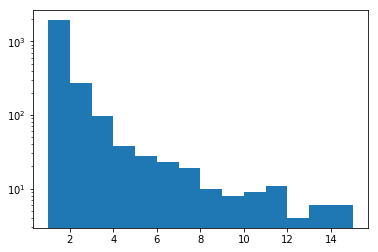

In [10]:
sortedList = list(hashtags.values())
sortedList.sort(reverse =True)

plt.hist(sortedList,bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],log=True)
plt.show

In [11]:
#esistono caratteri asiatici, rimuovo
data['modded1'] = data["modded1"].str.replace("[^\x00-\x7F]",' ')

In [12]:
#remove &amp, special html character for &
data['modded1'] = data["modded1"].str.replace("&amp",' ')

#remove punctuation
data['modded1'] = data["modded1"].str.replace("[^\w\s]",'')

In [17]:
#rimosso &amp correttamente
for idx,row in data.iterrows():
    l = re.findall("&amp",row["modded1"])
    if len(l) != 0:
        print(row["modded1"])

In [18]:
#remove links
data["modded1"] = data["modded1"].str.replace("http\S+"," ")

data["noTags_punct"] = data["modded1"]

#remove stopwords
import nltk
from nltk.corpus import stopwords

stop = stopwords.words('english')

data['modded1'] = data['modded1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
#there are empty rows
#data = data[data["modded1"] != ""]
data["modded1"]

0        sure tune watch donald trump late night david ...
1        donald trump appearing view tomorrow morning d...
2        donald trump reads top ten financial tips late...
3        new blog post celebrity apprentice finale less...
4        persona never wallflower rather build walls cl...
5        miss usa tara conner fired ive always believer...
6        listen interview donald trump discussing new b...
7        strive wholeness keep sense wonder intact dona...
8        enter think like champion signed book keychain...
9        achiever achieves plateau beginning donald j t...
10       afraid unique like afraid best self donald j t...
11          win lives champions view moment donald j trump
12       dayswe could use little power trumpative think...
13       always know could precipice something great do...
14       read great interview donald trump appeared new...
15          keep fast short direct whatever donald j trump
16       dont forget enter think like champion signed b.

In [19]:
#stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stemmedTweets = []

for idx, row in data.iterrows():
    test = row["modded1"].split()
    desc = ""
    for el in test:
        desc = desc + " " + stemmer.stem(el) + " "
    stemmedTweets.append(desc)
temp = pd.Series(stemmedTweets)
data["modded1_stemmed"] = temp


In [20]:
data["modded1_stemmed"]

0         sure  tune  watch  donald  trump  late  night...
1         donald  trump  appear  view  tomorrow  morn  ...
2         donald  trump  read  top  ten  financi  tip  ...
3         new  blog  post  celebr  apprentic  final  le...
4         persona  never  wallflow  rather  build  wall...
5         miss  usa  tara  conner  fire  ive  alway  be...
6         listen  interview  donald  trump  discuss  ne...
7         strive  whole  keep  sens  wonder  intact  do...
8         enter  think  like  champion  sign  book  key...
9         achiev  achiev  plateau  begin  donald  j  tr...
10        afraid  uniqu  like  afraid  best  self  dona...
11        win  live  champion  view  moment  donald  j ...
12        daysw  could  use  littl  power  trump  think...
13        alway  know  could  precipic  someth  great  ...
14        read  great  interview  donald  trump  appear...
15        keep  fast  short  direct  whatev  donald  j ...
16        dont  forget  enter  think  like  champion  s.

28931


<function matplotlib.pyplot.show(*args, **kw)>

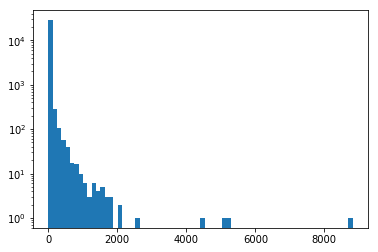

In [21]:
stemmed_words = pd.Series(' '.join(data['modded1_stemmed']).split()).value_counts()
print(len(stemmed_words))
plt.hist(stemmed_words.values,bins=70,log=True)
plt.show

6317


<function matplotlib.pyplot.show(*args, **kw)>

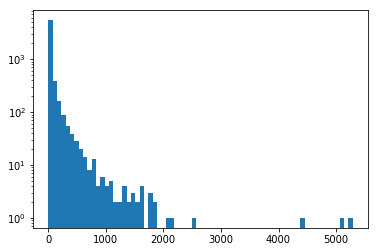

In [22]:
stemmed_words = stemmed_words[stemmed_words > 3]
stemmed_words = stemmed_words[stemmed_words < 7000]
print(len(stemmed_words))
plt.hist(stemmed_words.values,bins=70,log=True)
plt.show

In [23]:
stemmed_words

great             5285
trump             5067
thank             4454
presid            2544
get               2120
peopl             2099
make              1851
us                1844
go                1796
donald            1761
countri           1745
america           1647
time              1636
obama             1608
would             1589
new               1561
like              1515
need              1487
run               1461
job               1439
vote              1403
one               1376
rt                1358
good              1356
love              1317
look              1316
big               1278
want              1224
work              1196
year              1191
                  ... 
milton               4
mic                  4
rourk                4
herebi               4
74                   4
billgat              4
glimps               4
grandkid             4
slip                 4
excori               4
spous                4
ingenu               4
monmouth   

In [24]:
c = 0
l = 0
for idx,row in data.iterrows():
    l = l + len(row["text"].split())
    c = c + len(row["modded1_stemmed"].split())
print("original text",l)
print("modded and stemmed",c)

original text 682568
modded and stemmed 391932


In [25]:
#data.iloc[37251]["modded1"] == "" true
data = data[data["modded1"] != ""] 
data["modded1"]

0        sure tune watch donald trump late night david ...
1        donald trump appearing view tomorrow morning d...
2        donald trump reads top ten financial tips late...
3        new blog post celebrity apprentice finale less...
4        persona never wallflower rather build walls cl...
5        miss usa tara conner fired ive always believer...
6        listen interview donald trump discussing new b...
7        strive wholeness keep sense wonder intact dona...
8        enter think like champion signed book keychain...
9        achiever achieves plateau beginning donald j t...
10       afraid unique like afraid best self donald j t...
11          win lives champions view moment donald j trump
12       dayswe could use little power trumpative think...
13       always know could precipice something great do...
14       read great interview donald trump appeared new...
15          keep fast short direct whatever donald j trump
16       dont forget enter think like champion signed b.

In [26]:
data["noTags_punct"]

0        be sure to tune in and watch donald trump on l...
1        donald trump will be appearing on the view tom...
2        donald trump reads top ten financial tips on l...
3        new blog post celebrity apprentice finale and ...
4        my persona will never be that of a wallflower ...
5        miss usa tara conner will not be fired  ive al...
6        listen to an interview with donald trump discu...
7        strive for wholeness and keep your sense of wo...
8        enter the think like a champion signed book an...
9        when the achiever achieves its not a plateau i...
10       don t be afraid of being unique  its like bein...
11       we win in our lives by having a champions view...
12       these dayswe could all use a little of the pow...
13       always know you could be on the precipice of s...
14       read a great interview with donald trump that ...
15       keep it fast short and direct  whatever it is ...
16       dont forget to enter the think like a champion.

In [27]:
data.to_json("preprocessingDoneRight.json")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import scipy.sparse as sp
from scipy.sparse import hstack

vectorizer = TfidfVectorizer(stop_words='english')

data1 = data[data["year"] == 2018]
X = vectorizer.fit_transform(data1["modded1"])

#for i, col in enumerate(vectorizer.get_feature_names()):
#    data2[col] = pd.SparseSeries(X[:, i].toarray().ravel(), fill_value=0)


#df1 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())   
#df1
#data2


true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print(model.inertia_)
#con l'ultima maniera è più bassa di 1000 rispetto a fede, viene tipo 2400 alei 3800
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print
    
from sklearn.metrics import silhouette_score
silhouette_score(X, model.labels_)
